In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import optuna
import plotly.express as px
from kmeans import *

# Visualizing MNIST

In [2]:
#Loading the data
M = loadmat('MNIST_digit_data.mat')
images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

In [3]:
#randomly permute data points
inds = np.random.permutation(images_train.shape[0])
images_train = images_train[inds]
labels_train = labels_train[inds]


inds = np.random.permutation(images_test.shape[0])
images_test = images_test[inds]
labels_test = labels_test[inds]

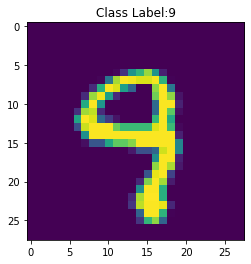

In [4]:
#show the 10'th train image
i=10
im = images_train[i,:].reshape((28,28),order='F')
plt.imshow(im)
plt.title('Class Label:'+str(labels_train[i][0]))
plt.show()

# K Means- Lloyd's Algorithm

### Hyperparameter Tuning

In [11]:
def objective(trial):
    hyperparam = Hyperparameters(
        threshold = trial.suggest_float("threshold", 0.00000000000000001, 0.00000000001)
    )
    model = kMeans(hyperparam)
    model.train(images_train, labels_train)
    return model.accuracy()

In [12]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2022-05-04 18:50:02,374] A new study created in memory with name: no-name-a361811b-40e5-4817-8703-27ad5c63cde5
[I 2022-05-04 18:50:10,109] Trial 0 finished with value: 0.49871984539650654 and parameters: {'threshold': 0.0755164991343462}. Best is trial 0 with value: 0.49871984539650654.
[I 2022-05-04 18:50:17,837] Trial 1 finished with value: 0.45591932369293003 and parameters: {'threshold': 0.003169964872959346}. Best is trial 0 with value: 0.49871984539650654.
[I 2022-05-04 18:50:43,454] Trial 2 finished with value: 0.5608026651724083 and parameters: {'threshold': 0.011813638338077529}. Best is trial 2 with value: 0.5608026651724083.
[I 2022-05-04 18:51:00,193] Trial 3 finished with value: 0.5029055294944407 and parameters: {'threshold': 0.0047200322855938635}. Best is trial 2 with value: 0.5608026651724083.
[I 2022-05-04 18:51:16,980] Trial 4 finished with value: 0.4600589798807355 and parameters: {'threshold': 0.0054555747275154606}. Best is trial 2 with value: 0.560802665172408

[I 2022-05-04 18:58:25,622] Trial 43 finished with value: 0.46853537548051016 and parameters: {'threshold': 0.010993847991241607}. Best is trial 2 with value: 0.5608026651724083.
[I 2022-05-04 18:58:36,713] Trial 44 finished with value: 0.5132079864598555 and parameters: {'threshold': 0.004970308842222011}. Best is trial 2 with value: 0.5608026651724083.
[I 2022-05-04 18:58:44,016] Trial 45 finished with value: 0.39073181751885 and parameters: {'threshold': 0.019384001855859888}. Best is trial 2 with value: 0.5608026651724083.
[I 2022-05-04 18:58:51,306] Trial 46 finished with value: 0.3706540246954554 and parameters: {'threshold': 0.01265068099194595}. Best is trial 2 with value: 0.5608026651724083.
[I 2022-05-04 18:58:58,603] Trial 47 finished with value: 0.3858555285445391 and parameters: {'threshold': 0.09049038801843903}. Best is trial 2 with value: 0.5608026651724083.
[I 2022-05-04 18:59:11,407] Trial 48 finished with value: 0.4863712711212253 and parameters: {'threshold': 0.0003

[I 2022-05-04 19:05:17,224] Trial 86 finished with value: 0.46685780239668506 and parameters: {'threshold': 0.009538619341603563}. Best is trial 2 with value: 0.5608026651724083.
[I 2022-05-04 19:05:24,645] Trial 87 finished with value: 0.414126472208376 and parameters: {'threshold': 0.08156084993346706}. Best is trial 2 with value: 0.5608026651724083.
[I 2022-05-04 19:05:35,950] Trial 88 finished with value: 0.5728127279571354 and parameters: {'threshold': 0.005058804292339338}. Best is trial 88 with value: 0.5728127279571354.
[I 2022-05-04 19:05:47,142] Trial 89 finished with value: 0.4753389064956437 and parameters: {'threshold': 0.014287857843935731}. Best is trial 88 with value: 0.5728127279571354.
[I 2022-05-04 19:05:54,627] Trial 90 finished with value: 0.44667491339262894 and parameters: {'threshold': 0.0023799068944204407}. Best is trial 88 with value: 0.5728127279571354.
[I 2022-05-04 19:06:06,031] Trial 91 finished with value: 0.5016775266072107 and parameters: {'threshold':

In [13]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2022-05-04 19:07:20,781] A new study created in memory with name: no-name-789b9742-4b0f-4f28-a33a-7d12a63e2f6b
[I 2022-05-04 19:07:32,076] Trial 0 finished with value: 0.4937754818749164 and parameters: {'threshold': 0.0003203441392529541}. Best is trial 0 with value: 0.4937754818749164.
[I 2022-05-04 19:07:39,496] Trial 1 finished with value: 0.3307063779825019 and parameters: {'threshold': 0.06046801678189901}. Best is trial 0 with value: 0.4937754818749164.
[I 2022-05-04 19:07:46,874] Trial 2 finished with value: 0.3878871463490375 and parameters: {'threshold': 0.038004684416063375}. Best is trial 0 with value: 0.4937754818749164.
[I 2022-05-04 19:07:54,321] Trial 3 finished with value: 0.44640875340438113 and parameters: {'threshold': 0.08033933470048052}. Best is trial 0 with value: 0.4937754818749164.
[I 2022-05-04 19:08:01,688] Trial 4 finished with value: 0.38194916964404113 and parameters: {'threshold': 0.09600182606545504}. Best is trial 0 with value: 0.4937754818749164.
[

[I 2022-05-04 19:23:51,208] Trial 43 finished with value: 0.44914089139538327 and parameters: {'threshold': 0.015391769449463168}. Best is trial 32 with value: 0.5601484154933529.
[I 2022-05-04 19:24:30,015] Trial 44 finished with value: 0.5081432960900918 and parameters: {'threshold': 0.00776138381953448}. Best is trial 32 with value: 0.5601484154933529.
[I 2022-05-04 19:25:08,205] Trial 45 finished with value: 0.47079428133837425 and parameters: {'threshold': 0.0005868942195232521}. Best is trial 32 with value: 0.5601484154933529.
[I 2022-05-04 19:25:33,689] Trial 46 finished with value: 0.46255095663455714 and parameters: {'threshold': 0.022599255908481823}. Best is trial 32 with value: 0.5601484154933529.
[I 2022-05-04 19:25:59,177] Trial 47 finished with value: 0.502235249742404 and parameters: {'threshold': 0.03682566179509705}. Best is trial 32 with value: 0.5601484154933529.
[I 2022-05-04 19:26:24,728] Trial 48 finished with value: 0.48700939986964037 and parameters: {'threshol

[I 2022-05-04 19:46:42,809] Trial 86 finished with value: 0.4473361392938391 and parameters: {'threshold': 0.048536957536957435}. Best is trial 63 with value: 0.5799425961637373.
[I 2022-05-04 19:47:21,453] Trial 87 finished with value: 0.42815381407575465 and parameters: {'threshold': 0.0064354720356119945}. Best is trial 63 with value: 0.5799425961637373.
[I 2022-05-04 19:48:00,094] Trial 88 finished with value: 0.48431236971950287 and parameters: {'threshold': 0.0024910169865282952}. Best is trial 63 with value: 0.5799425961637373.
[I 2022-05-04 19:48:25,580] Trial 89 finished with value: 0.482006377381706 and parameters: {'threshold': 0.02179741002296051}. Best is trial 63 with value: 0.5799425961637373.
[I 2022-05-04 19:48:51,087] Trial 90 finished with value: 0.48741423532407174 and parameters: {'threshold': 0.018497390286646112}. Best is trial 63 with value: 0.5799425961637373.
[W 2022-05-04 19:49:03,858] Trial 91 failed because of the following error: IndexError('arrays used as

IndexError: arrays used as indices must be of integer (or boolean) type